In [424]:
%%s
!pip install torch torchvision -U
!pip install opencv-python

[cellevents:43:INFO]:starting (time=Nov-12 05:58 MainProcess)


time: 1.52 ms


In [425]:
import sys
import PIL

#Imports * from ipstartup.py in utils folder
sys.path.insert(0, "utils")
from ipstartup import *

import cv2
import numpy as np

[cellevents:43:INFO]:starting (time=Nov-12 05:58 MainProcess)


time: 1.5 ms


In [426]:
from imgseg.predict import predict, show, apply_mask
from torchvision.models.detection import maskrcnn_resnet50_fpn, fasterrcnn_resnet50_fpn
from PIL import Image
import time

[cellevents:43:INFO]:starting (time=Nov-12 05:58 MainProcess)


time: 1.32 ms


In [427]:
!ls trainrgb/scans/1583462481-e4vbd8pnrg/100/rgb_1583462481-e4vbd8pnrg_1591122197970_100_1029804.6101950521.jpg

[cellevents:43:INFO]:starting (time=Nov-12 05:58 MainProcess)


trainrgb/scans/1583462481-e4vbd8pnrg/100/rgb_1583462481-e4vbd8pnrg_1591122197970_100_1029804.6101950521.jpg
time: 157 ms


In [428]:
model = maskrcnn_resnet50_fpn(pretrained=True)

[cellevents:43:INFO]:starting (time=Nov-12 05:58 MainProcess)


time: 645 ms


In [429]:
#Applies MaskRCNN on downscaled image by 10x
def predictByResize(image, flag=0, factor=10):
    print("Original Image Dimension: ",image.size)
    rimage = image
    if flag==1:
        newsize = (int(image.size[0]/factor), int(image.size[1]/factor)) 
        rimage = image.resize(newsize) 
    start_time = time.time()
    print("After Resizing, Image Dimension: ",rimage.size)
    out = predict(rimage, model)
    print("Time: %s s" % (time.time() - start_time))
    return (rimage, out)

[cellevents:43:INFO]:starting (time=Nov-12 05:58 MainProcess)


time: 2.17 ms


In [430]:
#File path
f = r"trainrgb/scans/1583462481-e4vbd8pnrg/100/rgb_1583462481-e4vbd8pnrg_1591122197970_100_1029804.6101950521.jpg"

#Load Image
image = Image.open(f)

#Prediction
outputImage = predictByResize(image, flag=1, factor=5) #Applying MaskRCNN

#Getting the masked region
region = outputImage[1] 
mask_area = int(np.reshape(region['masks'], (-1, region['masks'].shape[-1])).astype(np.float32).sum())

#Mask Stats like percentage of body covered, mask area
perc_body_covered = mask_area*100/(outputImage[0].size[0]*outputImage[0].size[1])
perc_body_covered = round(perc_body_covered, 2)
print("Mask Area:",mask_area,"px")
print("Percentage of body covered to total pixels:",perc_body_covered,"%")

[cellevents:43:INFO]:starting (time=Nov-12 05:58 MainProcess)


Original Image Dimension:  (1920, 1080)
After Resizing, Image Dimension:  (384, 216)
Time: 3.078155994415283 s
Mask Area: 18236 px
Percentage of body covered to total pixels: 21.99 %
time: 3.11 s


[cellevents:43:INFO]:starting (time=Nov-12 05:58 MainProcess)


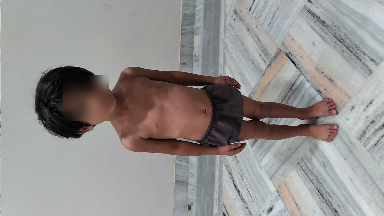

time: 28.2 ms


In [431]:
#Original Image
display(outputImage[0])

[cellevents:43:INFO]:starting (time=Nov-12 05:58 MainProcess)


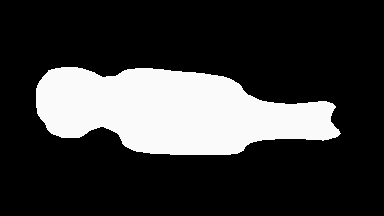

time: 9.8 ms


In [432]:
#Display the mask region, by default
width, height = outputImage[0].size
blank_img_arr = np.zeros((height,width,3), np.uint8)
blank_img = Image.fromarray(blank_img_arr, 'RGB')
show(blank_img, outputImage[1], alpha=0.9999) #Returns an binary image 

In [434]:
#File path
f = r"trainrgb/scans/1585003291-npaa8l8yxt/200/rgb_1585003291-npaa8l8yxt_1597112683680_200_821.531431559.jpg"

#Load Image
image = Image.open(f)

#Prediction
outputImage = predictByResize(image, flag=1, factor=5) #Applying MaskRCNN

#Getting the masked region
region = outputImage[1] 
mask_area = int(np.reshape(region['masks'], (-1, region['masks'].shape[-1])).astype(np.float32).sum())

#Mask Stats like percentage of body covered, mask area
perc_body_covered = mask_area*100/(outputImage[0].size[0]*outputImage[0].size[1])
perc_body_covered = round(perc_body_covered, 2)
print("Mask Area:",mask_area,"px")
print("Percentage of body covered to total pixels:",perc_body_covered,"%")

[cellevents:43:INFO]:starting (time=Nov-12 05:58 MainProcess)


Original Image Dimension:  (1920, 1080)
After Resizing, Image Dimension:  (384, 216)
Time: 3.050915002822876 s
Mask Area: 13248 px
Percentage of body covered to total pixels: 15.97 %
time: 3.09 s


[cellevents:43:INFO]:starting (time=Nov-12 05:58 MainProcess)


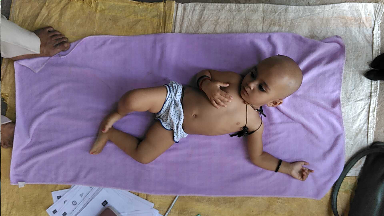

time: 33.9 ms


In [435]:
#Original Image
display(outputImage[0])

[cellevents:43:INFO]:starting (time=Nov-12 05:58 MainProcess)


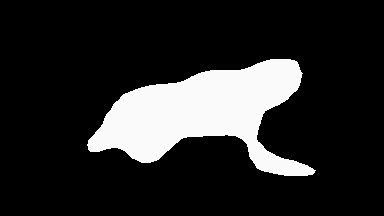

time: 10.1 ms


In [436]:
#Display the mask region, by default
width, height = outputImage[0].size
blank_img_arr = np.zeros((height,width,3), np.uint8)
blank_img = Image.fromarray(blank_img_arr, 'RGB')
show(blank_img, outputImage[1], alpha=0.9999) #Returns an binary image 

In [437]:
#f = r"trainrgb/scans/1585003291-npaa8l8yxt/200/rgb_1585003291-npaa8l8yxt_1597112683680_200_821.531431559.jpg"
#f = r"trainrgb/scans/1585003414-1qlf0qlv29/100/rgb_1585003414-1qlf0qlv29_1591708847031_100_876217.1931517591.jpg"
f = r"trainrgb/scans/1583438084-zkafuhr4xx/100/rgb_1583438084-zkafuhr4xx_1591122031563_100_166438.52068312402.jpg"
image = Image.open(f)
image = image.rotate(270, expand = 1)
outputImage = predictByResize(image, 1, 5)

[cellevents:43:INFO]:starting (time=Nov-12 05:58 MainProcess)


Original Image Dimension:  (1080, 1920)
After Resizing, Image Dimension:  (216, 384)
Time: 2.960322380065918 s
time: 3.03 s


[cellevents:43:INFO]:starting (time=Nov-12 05:58 MainProcess)


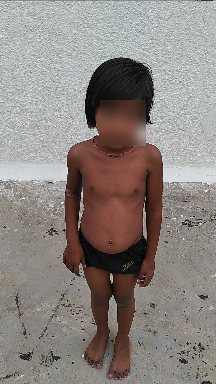

time: 37.8 ms


In [438]:
#Original Image
display(outputImage[0])

[cellevents:43:INFO]:starting (time=Nov-12 05:58 MainProcess)


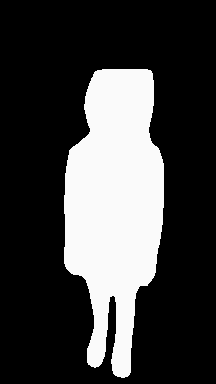

time: 10 ms


In [439]:
#Display the mask region, by default
width, height = outputImage[0].size
blank_img_arr = np.zeros((height,width,3), np.uint8)
blank_img = Image.fromarray(blank_img_arr, 'RGB')
show(blank_img, outputImage[1], alpha=0.9999) #Returns an binary image 